# Exploratory data analysis of WhatsApp chat

# *Introduction*:

The dataset is a group chat data stored in the form of a text file. The group chat data was obtained from my personal whatsapp group chat. I am trying to find out interesting insights about who is most active, who are ghosts (the ones who do not reply), my sleep schedule, the most used emoji, the sentiment score of each person, who swears the most, the most active times of the day, or does the group use phones during college teaching hours? I am using the libraries numpy, pandas, matplotlib, seaborn, ,wordcloud, emoji and jovian.

## *Overview*
- Introduction
- Data Retrieval & Preprocessing 
- Exploratory Data Analysis
- Data Visualization 
- Data Interpretation
- Summarizing the Inferences
- Conclusion

# *Importing Necessary Libraries*

We will be using :
1. **Regex (re)** to extract and manipulate strings based on specific patterns.
    - References:
        - [Regex - Python Docs](https://docs.python.org/3/library/re.html)
        - [Regex cheatsheet](https://www.rexegg.com/regex-quickstart.html)
        - [Regex Test - live](https://regexr.com/)
        - [Datetime Format](http://strftime.org/)
2. **pandas** for analysis.
3. **matlotlib** and **seaborn** for visualization.
4. **emoji** to deal with emojis.
    - References:
        - [Python Docs](https://pypi.org/project/emoji/)
        - [Emoji](https://github.com/carpedm20/emoji)
        - [EMOJI CHEAT SHEET](https://www.webfx.com/tools/emoji-cheat-sheet/)
5. **wordcloud** for the most used words.

In [40]:
pip install numpy pandas matplotlib seaborn wordcloud emoji jovian --upgrade

     |████████████████████████████████| 17.1 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 59.2 MB/s eta 0:00:01
     |████████████████████████████████| 11.8 MB 80.0 MB/s eta 0:00:01
     |████████████████████████████████| 288 kB 68.0 MB/s eta 0:00:01
     |████████████████████████████████| 458 kB 68.0 MB/s eta 0:00:01
     |████████████████████████████████| 216 kB 76.6 MB/s eta 0:00:01
     |████████████████████████████████| 965 kB 62.9 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 82.8 MB/s eta 0:00:01
     |████████████████████████████████| 11.8 MB 48.1 MB/s eta 0:00:01
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=18bf1542048882745009c60fb550cca982212b1425cb0767194143d01a68752f
  Stored in directory: /home/jovyan/.cache/pip/wheels/b0/4a/c8/9c580a0ea94dea641b8023456a1b178a7e4509d992224ed4aa
Successfully built emoji
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstal

Let's begin by downloading the data, and listing the files within the dataset.

In [41]:
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import itertools 
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

##### NOTE: 
- This special command `%matplotlib inline` to ensure that plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows.
- `warnings.filterwarnings('ignore')`: The warnings filter controls whether warnings are ignored, displayed, or turned into errors (raising an exception). [REFERENCE](https://docs.python.org/3/library/warnings.html)

## *Preparing data and reading data*

In [4]:
def rawToDf(file, key):
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

#### *NOTE*:
- Since WhatsApp texts are *multi-line*, you cannot just read the file line by line and get each message that you want. Instead, you need a way to *identify* if a line is a new message or part of an old message. You could use regular expressions.
- While reading each line, I split it based on a comma and then I took the first item returned from the `split()` function. If the line is a new message, the first item would be a valid date, and it will be appended as a new message to the list of messages. If it’s not, the message is part of the previous message, and hence, will be appended to the end of the previous message as one continuous message.

Let us save and upload our work to Jovian before continuing.

In [20]:
project_name = "zerotopandas-course-project-whatsapp-chat-analysis" 

In [21]:
!pip install jovian --upgrade -q

In [22]:
import jovian

In [23]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "mihirchowdhury05/zerotopandas-course-project-whatsapp-chat-analysis"
[jovian] Committed successfully! https://jovian.ai/mihirchowdhury05/zerotopandas-course-project-whatsapp-chat-analysis


'https://jovian.ai/mihirchowdhury05/zerotopandas-course-project-whatsapp-chat-analysis'

## *Prior Information of my Whatsapp Data*

- It has **6** participants.
- This group was made on **March 2022.**


In [6]:
df = rawToDf('chat-data.txt', '24hr')

## Data Pre-Processing 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097 entries, 0 to 4096
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  4097 non-null   datetime64[ns]
 1   user       4097 non-null   object        
 2   msg        4097 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 96.1+ KB


### The dataset contains 3 columns (attributes), and 4097 rows (entries or tuples).
- Here is how it looks like:

In [26]:
df.tail()

,date_time,user,msg
4092,2022-10-17 22:49:00,Vikram Kashyap,Tereko utha ke ghumayenge Worry not☺️
4093,2022-10-24 09:29:00,Shradha Mahajan,<Media omitted>
4094,2022-10-24 09:46:00,Mihir,<Media omitted>
4095,2022-10-24 10:42:00,Vikram Kashyap,Happy Diwali Guys🥹✨🫶🏻🫂
4096,2022-10-24 12:25:00,Reema Khandelwal,Happy diwali everyone🪔🪔


### An important observation
- One might wonder there are no NaNs, but as you can see, there are some rows, where messages are an *empty string.*
- This can be because, the message might just contain **media** or **emojis**
#### To see, how many such rows are there, we can use `df[df['msg'] == ""].shape[0]`

In [27]:
df[df['msg'] == ""].shape[0]

20

## Adding extra *helper columns for analysis and visualization*

In [32]:
df['day'] = df['date_time'].dt.strftime('%a')
df['month'] = df['date_time'].dt.strftime('%b')
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())

# Now that we have a clean DataFrame to work with, it’s time to perform analysis on it.
### Final Data Frame

In [29]:
df

,date_time,user,msg,day,month,year,date
0,2022-03-04 21:58:00,grp_notif,Messages and calls are end-to-end encrypted. N...,Fri,Mar,2022,2022-03-04
1,2022-03-04 21:54:00,grp_notif,"Vikram Kashyap created group ""Hackathon""",Fri,Mar,2022,2022-03-04
2,2022-03-04 21:54:00,grp_notif,Vikram Kashyap added you,Fri,Mar,2022,2022-03-04
3,2022-03-04 21:55:00,Vikram Kashyap,Welcome aboard all😎✨🤝🏼,Fri,Mar,2022,2022-03-04
4,2022-03-04 21:58:00,Shradha Mahajan,Ohh wow 🎊,Fri,Mar,2022,2022-03-04
...,...,...,...,...,...,...,...
4092,2022-10-17 22:49:00,Vikram Kashyap,Tereko utha ke ghumayenge Worry not☺️,Mon,Oct,2022,2022-10-17
4093,2022-10-24 09:29:00,Shradha Mahajan,<Media omitted>,Mon,Oct,2022,2022-10-24
4094,2022-10-24 09:46:00,Mihir,<Media omitted>,Mon,Oct,2022,2022-10-24
4095,2022-10-24 10:42:00,Vikram Kashyap,Happy Diwali Guys🥹✨🫶🏻🫂,Mon,Oct,2022,2022-10-24


In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mihirchowdhury05/zerotopandas-course-project-whatsapp-chat-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mihirchowdhury05/zerotopandas-course-project-whatsapp-chat-analysis


'https://jovian.ai/mihirchowdhury05/zerotopandas-course-project-whatsapp-chat-analysis'

# Exploratory Analysis and Visualization

## *Data Analysis*

**1. Overall frequency of total messages on the group.**

**2. Top 10 most active days.**

**3. Top 4 active users on the group.**
- Ghosts present in the group.

**4. Top 4 users most sent media.**

**5. Top 10 most used emojis.**

**6. Most active hours and days.**
 - Heatmaps of weekdays and months.
 - Most active hours, weekdays, and months.

**7. Most used words - WordCloud**



# 1. Overall frequency of total messages on the group.
- I will first do this to get a look at overall data.

I will plot a simple line graph to see the frequency of messages over the months.
##### I expect to see a nice line graph with crests and troughs in odd places.

In [32]:
df1 = df.copy()      # I will be using a copy of the original data frame everytime, to avoid loss of data!
df1['message_count'] = [1] * df1.shape[0]      # adding extra helper column --> message_count.
df1.drop(columns='year', inplace=True)         # dropping unnecessary columns, using `inplace=True`, since this is copy of the DF and won't affect the original DataFrame.
df1 = df1.groupby('date').sum().reset_index()  # grouping by date; since plot is of frequency of messages --> no. of messages / day.
df1

,date,message_count
0,2022-03-04,22
1,2022-03-05,1
2,2022-03-12,137
3,2022-03-13,2
4,2022-03-15,12
...,...,...
95,2022-09-27,3
96,2022-10-02,3
97,2022-10-16,4
98,2022-10-17,19


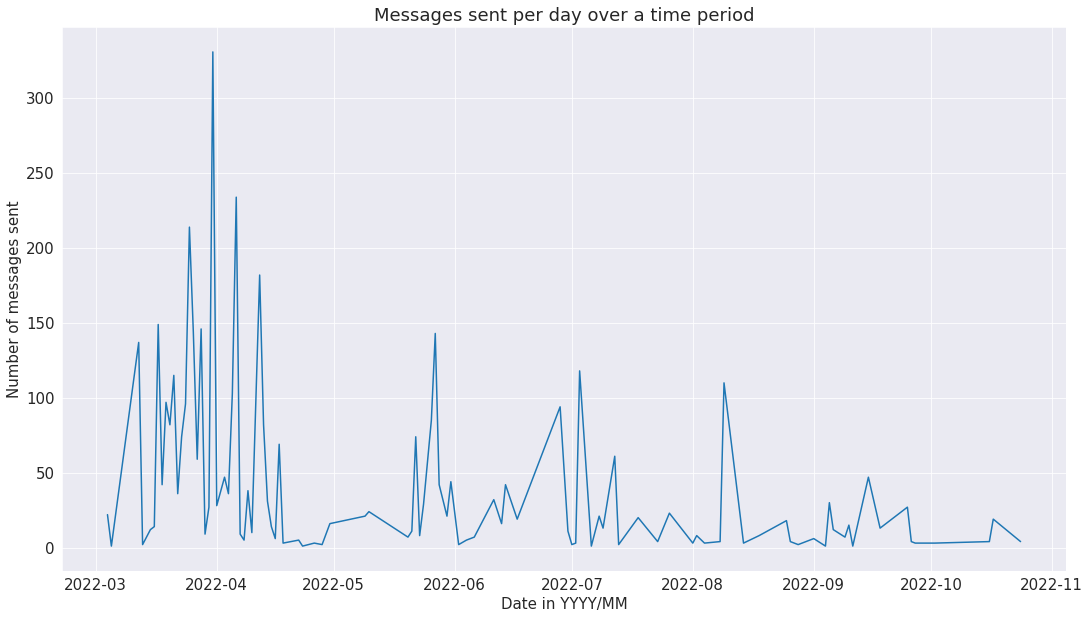

In [45]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (18, 10)      # Same as `plt.figure(figsize = (18, 10))`


# A basic plot
plt.plot(df1.date, df1.message_count)
plt.xlabel('Date in YYYY/MM')
plt.ylabel('Number of messages sent')
plt.title('Messages sent per day over a time period');


# Could have used Seaborn's lineplot as well.
# sns.lineplot(df1.date, df1.message_count);   


# Saving the plots
plt.savefig('msg_plots.svg', format = 'svg')

#### The line graph shows that the maximum no of messages were sent over the 2022-03 to 2022-05 time period.

# 2. *Top 10 most active days.*

In [46]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)    # Sort values according to the number of messages per day.
top10days.reset_index(inplace=True)           # reset index in order.
top10days.drop(columns="index", inplace=True) # dropping original indices.
top10days

,date,message_count
0,2022-03-31,331
1,2022-04-06,234
2,2022-03-25,214
3,2022-04-12,182
4,2022-03-17,149
5,2022-03-28,146
6,2022-03-26,144
7,2022-05-27,143
8,2022-03-12,137
9,2022-07-03,118


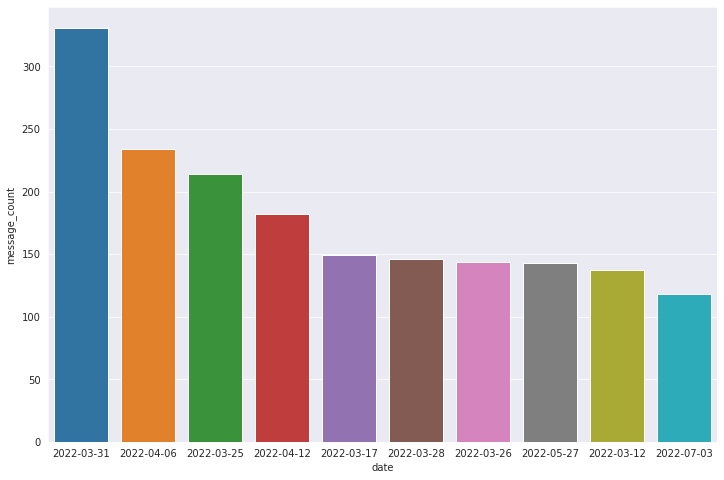

In [50]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)

# A bar plot for top 10 days
sns.barplot(x=top10days.date, y=top10days.message_count);

# Saving the plots
plt.savefig('top10_days.svg', format = 'svg')

#### Therefore, it can be concluded from the barplot that the group was very active on 31st March 2022.

# 3. *Top 4 active users on the group.*

### Before, analysing that, we will see the *number of Ghosts* in the group.

In [54]:
# Total number of people who have sent at least one message on the group;
print(f"Total number of people who have sent at least one message on the group are {len(df.user.unique()) - 1}")   # `-1` because excluding "group_notficiation"

print(f"Number of people who haven't sent even a single message on the group are {6 - len(df.user.unique()) + 1  }")

Total number of people who have sent at least one message on the group are 6
Number of people who haven't sent even a single message on the group are 0


**That means 0 people in the group have not sent even a single message. Therefore no ghost users exist in our dataset**

## Now, pre-processing top 4 active users.

In [8]:
df2 = df.copy()    
df2 = df2[df2.user != "grp_notif"]
top4df = df2.groupby("user")["msg"].count().sort_values(ascending=False)

# Final Data Frame
top4df = top4df.head(4).reset_index()
top4df

,user,msg
0,Vikram Kashyap,1157
1,Reema Khandelwal,926
2,Shradha Mahajan,707
3,Sahil Chharra,467


**This gives us the list of the top 4 active users.**

## Now, visualizing top 4 active users.

In [69]:
# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## *Now, I will be trying different visualization methods.*
##### Plotting a simple line graph.

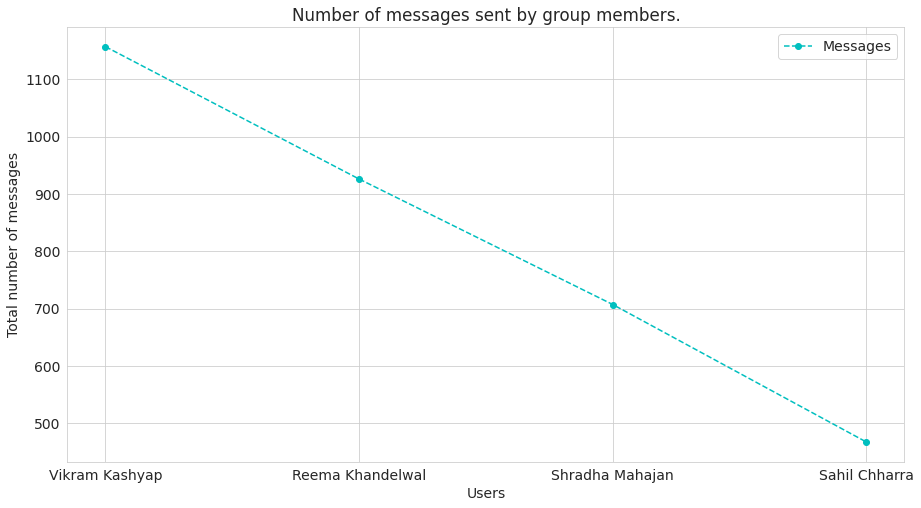

In [71]:
# Improving Default Styles using Seaborn
sns.set_style("whitegrid")

# Increasing the figure size
plt.figure(figsize=(15, 8))


# BETTER IMPLEMENTATION using the `fmt` argument;
plt.plot(top4df.user, top4df.msg, 'o--c')  


# Labels and Title 
plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.title("Number of messages sent by group members.")
plt.legend(['Messages']);

# Saving the plots
# plt.savefig('msg_plots.svg', format = 'svg')

#### *Plotting a bar chart and line graph together.*

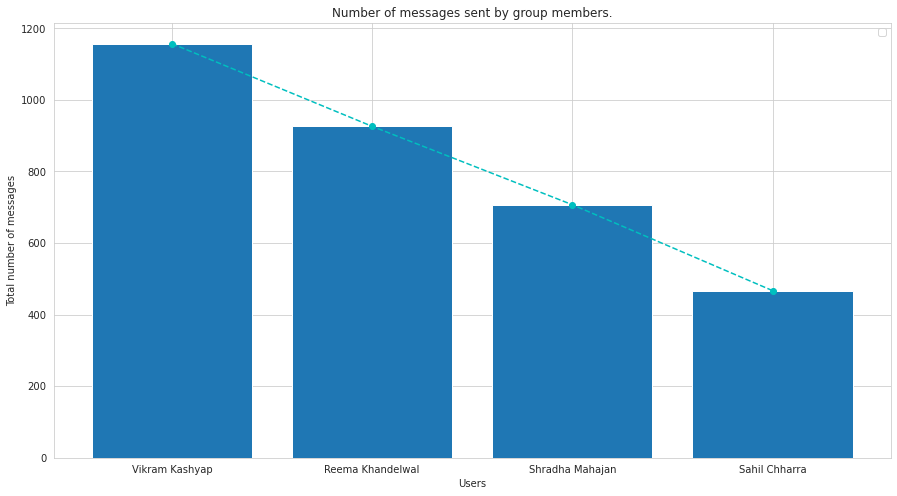

In [9]:
# Improving Default Styles using Seaborn
sns.set_style("whitegrid")

# Increasing the figure size
plt.figure(figsize=(15, 8))
plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.title("Number of messages sent by group members.")
plt.legend(['Messages']);

plt.bar(top4df.user, top4df.msg)   # basic bar chart
plt.plot(top4df.user, top4df.msg, 'o--c');   # line chart

### *Beautifying Default Styles using Seaborn*

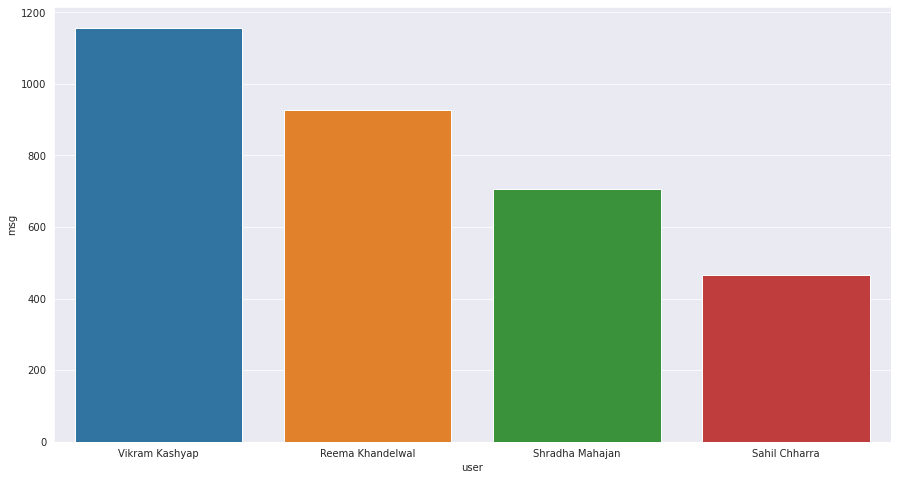

In [13]:
# Beautifying Default Styles using Seaborn
plt.figure(figsize=(15, 8))
sns.set_style("darkgrid")
sns.barplot(x=top4df.user, y=top4df.msg, data=top4df);

# *Important Note*

- Since almost all the plots will be ***comparing* one person with another**, I’ll assign a **specific colour to each person** so that it becomes **easy to identify** each person among *multiple plots*. 

- I could've used *seaborn's color palette* but:
    - Seaborn assigns default colors itself, but i wanted the color of a **certain person remains the same, no matter the plot**;
    - Also, I wanted to try some different colors so I grabbed my **colour palette** from https://coolors.co/

- Next, I made a dictionary where each key is the name and the value for each would be their assigned colour. I create a function which reorders colours given a list of names to match the ordering of the plot. This function takes the ordered names as input and returns a reordered list of colours. This list has to be passed into the `pallete` argument in a seaborn plotting function.

## Defining a function to tackle the problem.

I'm defining the following function to ***maintain consistent colors for each person across all plots***. Since the order will vary depending on the plot, this is passed to the function which will reorder colors in a particular order so that **the color of a certain person remains the same no matter the plot**. This will help maintain **consistency and readability** amongst the many graphs I will be plotting.


In [14]:
def get_colors_of_certain_order(names_in_certain_order):
    '''the color of a certain person remains the same, no matter the plot'''
    
    order = list(names_in_certain_order)
    return_list = []
    
    for name in order:
        return_list.append(color_dict[name])
        
    return return_list

### Now, we have a really nice set of colours for each person, with which we can visualize using `sns.palplot`.

{'Vikram Kashyap': '#F94144',
 'Reema Khandelwal': '#43AA8B',
 'Shradha Mahajan': '#6D597A',
 'Sahil Chharra': '#003F88'}

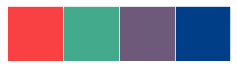

In [21]:
colors = ['#F94144', '#43AA8B', '#6D597A','#003F88']
sns.palplot(colors)    # visualizing the colors' list

names = top4df.user

color_dict = {}
for name, color in zip(names, colors):
    color_dict[name] = color
color_dict

## Now, finding the *average message length* of the 4 most active users of the group.

In [44]:
# Adding another column for message length; using the apply method;
df2['message_length'] = df2['msg'].apply(lambda x: len(x))      

# Creating another dataframe for average length per user;
avg_msg_lengths = df2.groupby(df2.user).mean().reset_index().sort_values(by = 'message_length', ascending = False)

# Creating helper columns;
top4df['avg_message_length'] = [0] * 4
i, j = 0, 0
while i < 4:
    if top4df['user'][i] == avg_msg_lengths['user'][j]:
        top4df['avg_message_length'][i] = avg_msg_lengths['message_length'][j]
        i += 1
        j = -1
    j += 1

# Sorting the average message lengths of the same to 10 active users;
top4df_msg = top4df.sort_values(by = "avg_message_length", ascending=False)

## Now, we will be plotting *most sent messages* and respective *average message lengths* simultaneously, to see some interesting results.
- Plotting multiple charts in a grid
    - Matplotlib and Seaborn also support plotting multiple charts in a grid, using `plt.subplots`, which returns a set of axes that can be used for plotting.

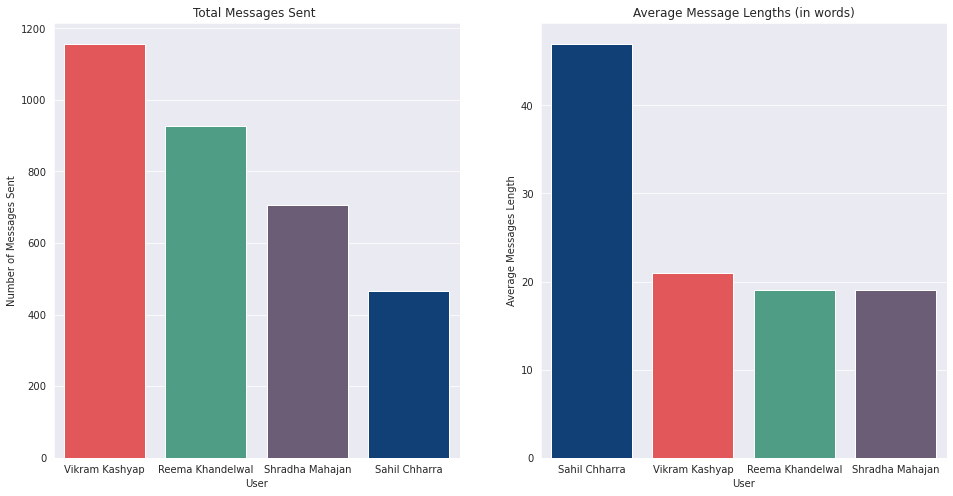

In [43]:
# plotting multiple charts in a grid
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.set_style("darkgrid")

# Plot 1 - Countplot of total messages sent
sns.barplot(top4df.user, top4df.msg, data=top4df, ax = axes[0], palette=get_colors_of_certain_order(top4df.user));     # Note: the palette argument;

axes[0].set_title('Total Messages Sent ')
axes[0].set_xlabel('User')
axes[0].set_ylabel('Number of Messages Sent')



# Plot 2 - Barplot of those top 10 users' average message lengths
sns.barplot(top4df_msg.user, top4df_msg.avg_message_length, ax = axes[1], palette = get_colors_of_certain_order(top4df_msg.user))    # Note: the respective palette argument;

axes[1].set_title('Average Message Lengths (in words)')
axes[1].set_xlabel('User');
axes[1].set_ylabel('Average Messages Length');

# Saving the plots
plt.savefig('top4_msg_plots_diff.svg', format = 'svg')

### It’s really interesting to see plots like this *side by side*, because here comes the twist:

- Ironically, **Sahil Chharra**, the person who sent the **least amount of texts** (400+), has ***highest*** messages' length (40+) on *average*. This means this person sends long but less WhatsApp messages  in one go. 

# 4. Top 4 users most sent media 
- The exported chats were exported without any media files. Any message that contained media was indicated with `‘<Media Omitted> ’`. 

### *Pre-processing*
**We can use this to filter out and see who sends the most media.**

In [36]:
# Using `groupby`, `count` and `sort_values` attributes.
top4media = df[df.msg == '<Media omitted> '].groupby('user').count().sort_values(by="msg", ascending = False).head(4)
# Dropping unused column;
top4media.drop(columns=['date_time', 'day', 'month', 'year', 'date'], inplace=True)

# Renaming column name for visualization;
top4media.rename(columns={"msg": "media_sent"}, inplace=True)

# resetting index;
top4media.reset_index(inplace=True)


### *Visualization using different Seaborn's Color Palettes*
- [Seaborn References](http://seaborn.pydata.org/tutorial/color_palettes.html#using-circular-color-systems)
- [Seaborn's Different Colors](https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08)
- [Seaborn's Color Visualization](https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/)

### Which user sends the most media?

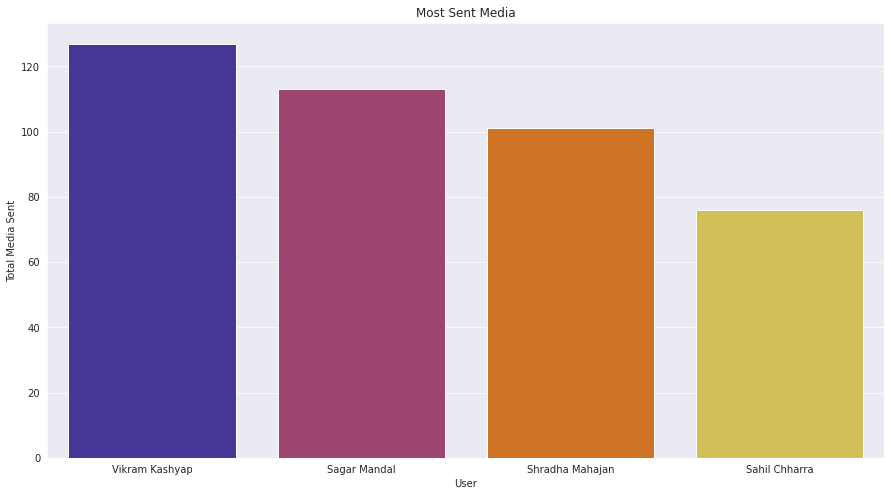

In [42]:
# Increasing the figure size
plt.figure(figsize=(15, 8))

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# Plotting a bar graph;
sns.barplot(top4media.user, top4media.media_sent, palette="CMRmap");

plt.title('Most Sent Media')
plt.xlabel('User')
plt.ylabel('Total Media Sent');

# Saving the plots
plt.savefig('top10media.svg', format = 'svg')



###  "Vikram Kashyap" sent the most media, followed by "Sagar Mandal". Hence the most dedicated contributor is "Vikram Kashyap."

# 5. Top 10 most used Emojis
- Will be using the `emoji` module, that was imported earlier.

In [52]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.EMOJI_DATA.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    emojis_found = r.findall(row["msg"])
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1

##### NOTE: 
- This special command `%matplotlib inline` to ensure that plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows.
- `warnings.filterwarnings('ignore')`: The warnings filter controls whether warnings are ignored, displayed, or turned into errors (raising an exception). [REFERENCE](https://docs.python.org/3/library/warnings.html)

#### Will create another helper column using `emoji.demojize("<emoji>")`, since emojis will not rendered.

In [53]:
top10emojis = pd.DataFrame()
# top10emojis = pd.DataFrame(data, columns={"emoji", "emoji_description", "emoji_count"}) 
top10emojis['emoji'] = [''] * 10
top10emojis['emoji_count'] = [0] * 10
top10emojis['emoji_description'] = [''] * 10

i = 0
for item in emoji_ctr.most_common(10):
    # will be using another helper column, since during visualization, the emojis won't be rendered.
    description = emoji.demojize(item[0])[1:-1]    # using `[1:-1]` to remove the colons ':' at the end of the demojized strin
    
    # appending top 10 data of emojis.  # Loading into a DataFrame.
    top10emojis.emoji[i] = item[0]
    top10emojis.emoji_count[i] = int(item[1])
    top10emojis.emoji_description[i] = description
    i += 1

top10emojis

,emoji,emoji_count,emoji_description
0,🥲,706,smiling_face_with_tear
1,😂,697,face_with_tears_of_joy
2,🤣,491,rolling_on_the_floor_laughing
3,🫂,256,people_hugging
4,🙂,142,slightly_smiling_face
5,🤧,136,sneezing_face
6,😅,132,grinning_face_with_sweat
7,😭,129,loudly_crying_face
8,😎,83,smiling_face_with_sunglasses
9,🤩,78,star-struck


### Which Emoji is the most used in the chat?

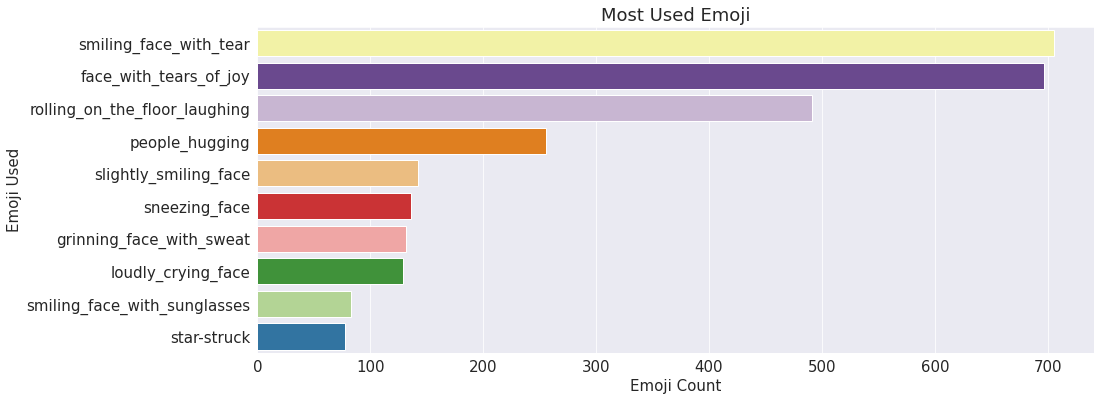

In [54]:
# Increasing the figure size
plt.figure(figsize=(15, 6))

# Better Readablity
import matplotlib
matplotlib.rcParams['font.size'] = 15

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# Plotting;
sns.barplot(top10emojis.emoji_count, top10emojis.emoji_description, palette = "Paired_r")

plt.title('Most Used Emoji')
plt.xlabel('Emoji Count')
plt.ylabel('Emoji Used');

# Saving the plots
plt.savefig('top10emoji.svg', format = 'svg')

###  "smiling_face_with_tear" emoji  just beats "face_with_tears_of_joy" emoji !

# 6. Most active days, most active hours, most active months.

### *Pre-processing*

In [56]:
df3 = df.copy()
df3['message_count'] = [1] * df.shape[0]    # helper column to keep a count.

df3['hour'] = df3['date_time'].apply(lambda x: x.hour)

grouped_by_time = df3.groupby('hour').sum().reset_index().sort_values(by = 'hour')

### Which hour of the day are most messages exchanged?

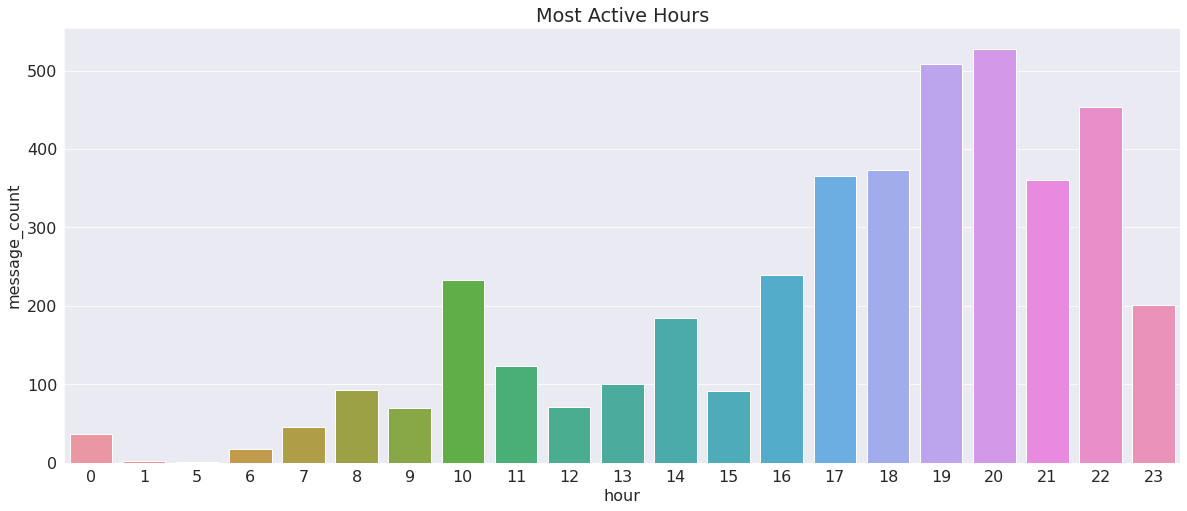

In [57]:
# Better Readablity
import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (20, 8)

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# PLOT: grouped by hour
sns.barplot(grouped_by_time.hour, grouped_by_time.message_count)
plt.title('Most Active Hours');

# Saving the plots;
plt.savefig('most_active_hours.svg', format = 'svg')

#### Intrestingly, the group is *most active between evening and midnight*, 

### *Pre-processing weekdays and months*

In [60]:
# specific `order` to be printed in;
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# grouping by day;
grouped_by_day = df3.groupby('day').sum().reset_index()[['day', 'message_count']]


# specific `order` to be printed in;
months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']   # from March till Oct, since chats are from March till Septemeber
# grouping by month;
grouped_by_month = df3.groupby('month').sum().reset_index()[['month', 'message_count']]

## *Visualization*
### Now, we will be plotting *grouped by day* and respective *group by month* simultaneously, to see some interesting results.
- Using `plt.subplots` to plot multiple charts in a grid.

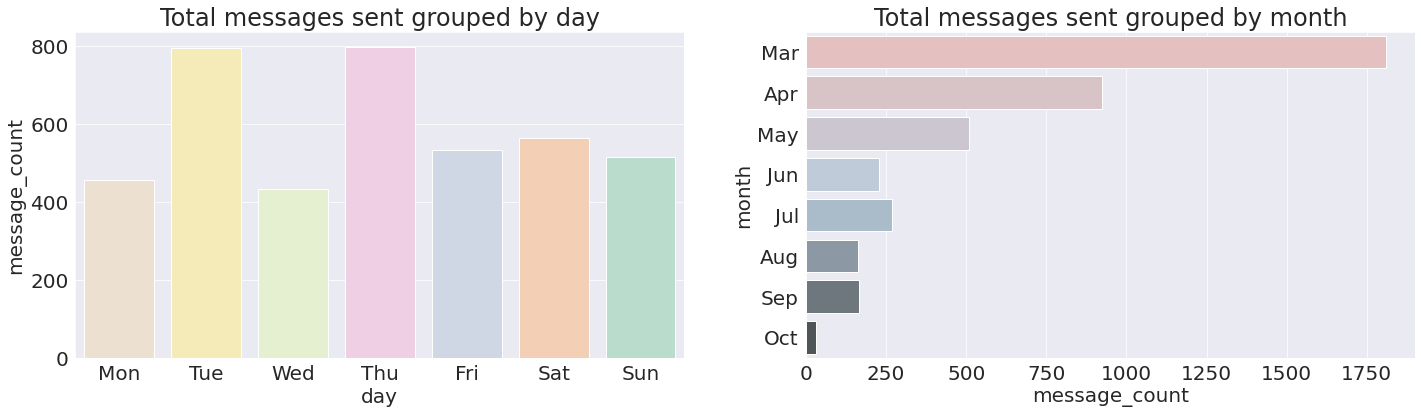

In [61]:
fig, axs = plt.subplots(1, 2, figsize = (24, 6))

# Better Readablity
import matplotlib
matplotlib.rcParams['font.size'] = 20

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# Plotting;

# PLOT 1: Messages grouped by weekday
sns.barplot(grouped_by_day.day, grouped_by_day.message_count, order=days, ax = axs[0], palette='Pastel2_r')
axs[0].set_title('Total messages sent grouped by day')

# PLOT 2: Messages grouped by months
sns.barplot(y = grouped_by_month.month, x=grouped_by_month.message_count, order = months, ax = axs[1], palette='Pastel1_d')
axs[1].set_title('Total messages sent grouped by month');

# Saving the plots;
plt.savefig('days_and_month.svg', format = 'svg')

##### The group is most active on Tuesdays and Thurdays and least active on Wednesday.
##### It was very active in March.

### Now, we will plot a *heatmap*, combining the above to bar plots, for a better understanding! 

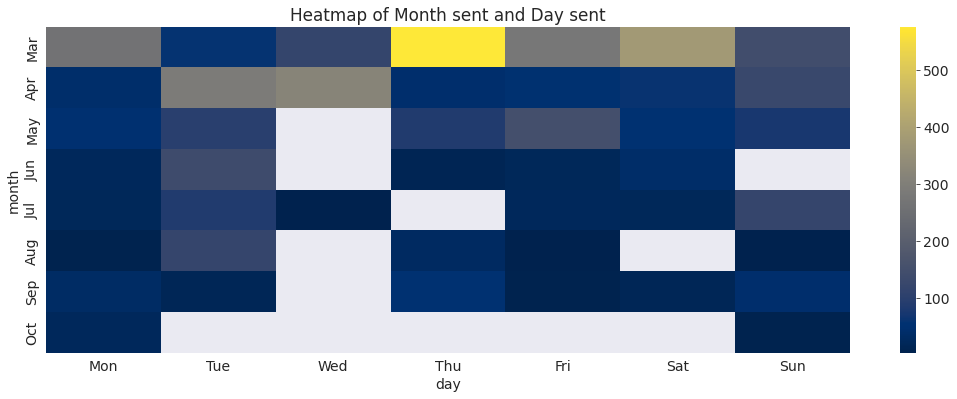

In [62]:
# Better Readablity
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 6)

# Beautifying Default Styles using Seaborn,
sns.set_style("darkgrid")

# Pre-Processing by month and day,
grouped_by_month_and_day = df3.groupby(['month', 'day']).sum().reset_index()[['month', 'day', 'message_count']]

# creating a pivot table,
pt = grouped_by_month_and_day.pivot_table(index = 'month', columns = 'day', values = 'message_count').reindex(index = months, columns = days)

# PLOT: heatmap.
sns.heatmap(pt, cmap = 'cividis');
plt.title('Heatmap of Month sent and Day sent');

# Saving the plots;
plt.savefig('month_day_heatmap.svg', format = 'svg')

# *Inferences*
- The group is more active on tuesdays and thurdays, throughout the months.
- March has the most lighter blue shades and more yellow gradients which tells us March has been the most active month.
- This gives a combined analysis, which is really helpful in real-time projects.

# Most used words in the chat.
### Finally, I will be ending with *the most used words*, using `WordCloud` module in Python.

In [71]:
comment_words = ' '

# stopwords --> Words to be avoided while forming the WordCloud,
# removed group_notifications like 'joined', 'deleted';
# removed really common words like "yeah" and "okay".
stopwords = STOPWORDS.update(['group', 'haa','nhi','bhi','nahi','link', 'invite', 'joined', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ka', 'na', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])


# iterate through the DataFrame.
for val in df3.msg.values:
    
    # typecaste each val to string.
    val = str(val) 
    
    # split the value.
    tokens = val.split() 
    
    # Converts each token into lowercase.
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(comment_words) 

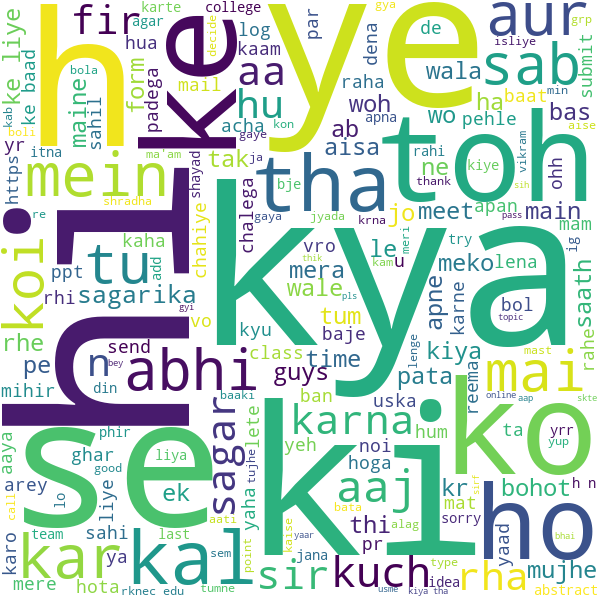

In [72]:
wordcloud.to_image()

Let us save and upload our work to Jovian before continuing

In [73]:
import jovian

In [74]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mihirchowdhury05/zerotopandas-course-project-whatsapp-chat-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mihirchowdhury05/zerotopandas-course-project-whatsapp-chat-analysis


'https://jovian.ai/mihirchowdhury05/zerotopandas-course-project-whatsapp-chat-analysis'

## Inferences and Conclusion:

- We first loaded the data as a .txt file coverted it using `RawtoDF` function.
- Then  we added helper columns, manipulated datetime entries.
- Then, we started analysing our whatsapp data!


- The insights were really interesting to look at! Here are the insights:-

**1. Overall frequency of total messages on the group.** 
- The maximum no of messages were sent over the 2022-03 to 2022-05 time period.

**2. Top 10 most active days.**
- The group was most active on 31st March 2022.
- The 10 most active days are (decreasing order): 31/03/2022, 06/06/2022, 25/03/2022, 12/04/2022, 17/03/2022, 28/03/2022, 26/03/2022, 27/05/2022, 12/03/2022, 03/07/2022 

**3. Top 4 active users on the group.**
- No Ghosts present in the group.
- Top 4 active users: Vikram Kashyap, Reema Khandelwal, Shraddha Mahajan, Sahil Chharra
- Ironically, **Sahil Chharra**, the person who sent the **least amount of texts** (400+), has ***highest*** messages' length (40+) on *average*. This means this person sends long but less WhatsApp messages  in one go. 

**4. Top 4 users most sent media.**
- Top 4 users most sent media: Vikram Kashyap, Sagar Mandal, Shraddha Mahajan, Sahil Chharra

**5. Top 10 most used emojis.**
-    🥲	  smiling_face_with_tear
-	😂		face_with_tears_of_joy
-	🤣	rolling_on_the_floor_laughing
-	🫂		people_hugging
-	🙂		slightly_smiling_face
-	🤧		sneezing_face
-	😅		grinning_face_with_sweat
-	😭		loudly_crying_face
-	😎		smiling_face_with_sunglasses
-	🤩		star-struck

**6. Most active hours and days.**
 - Heatmaps of weekdays and months.
 - Most active hours: 19-22 (evening to midnight), 
 -  Most active weekdays: Tuesday and Thursday 
 -  Most active month: March

**7. Most used words - WordCloud**
- Words like: 'kya', 'hi', 'tha' etc were most used.






In [1]:
import jovian

In [2]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mihirchowdhury05/zerotopandas-course-project-whatsapp-chat-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mihirchowdhury05/zerotopandas-course-project-whatsapp-chat-analysis


'https://jovian.ai/mihirchowdhury05/zerotopandas-course-project-whatsapp-chat-analysis'

# *The potential scope of this analysis*

- Extending this project **Exploratory data analysis of Whatsapp chat**!
  - Adding a **Sentiment Analyser to the texts** - Swear Words & Sentiments!
  - Libraries called `profanity_check`, `TextBlob`
  - VADER (Valence Aware Dictionary and Sentiment Reasoner) from NTLK and TextBlob.
- Instagram Data Analysis 
- Play Store Data Analysis
- Exploring more datasets! It is *never-ending*, as there can be ***Infinite Stories with Data***!
- Once, done with enough Data Analysis, we can try making Datasets, scraping Data from websites and creating Interesting Datasets! 

### That's it from my end! I hope you *learnt and enjoyed* a lot!

In [1]:
import jovian

In [81]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mihirchowdhury05/zerotopandas-course-project-my-whatsapp-chat-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mihirchowdhury05/zerotopandas-course-project-my-whatsapp-chat-analysis


'https://jovian.ai/mihirchowdhury05/zerotopandas-course-project-my-whatsapp-chat-analysis'